### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## Week 6: Assignment (Partial notebook)

The government employed an external consultant to assist with data analysis. However, the consultant resigned and left the project in a half-completed state. The government provided you with the partially completed Jupyter Notebook that the consultant developed. They asked you to evaluate and complete the Jupyter Notebook with Python code.

This assignment activity will consist of two parts: (1) demonstrate the use of the functions provided, and (2) answer additional questions posed by the government. The questions are:

- What is the difference between qualitative and quantitative data? How can these be used in business predictions?
- Why is continuous improvement required? Can we not just implement the project and move on to other pressing matters?
- As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Does that mean we can ignore data ethics?

In [1]:
# Libraries and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Simple hacks to make plots look better: 

# # Colour pallete to make charts look better.
blue, = sns.color_palette("muted", 1) 

# Darkgrid, white grid, dark, white and ticks.
sns.set_style('whitegrid') 

# Font size of the axes title.
plt.rc('axes', titlesize=18) 

# Font size of the x and y labels.
plt.rc('axes', labelsize=14)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=13,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=13,color='#4f4e4e')  

# Legend font size.
plt.rc('legend', fontsize=13)

# Controls default text sizes.
plt.rc('font', size=13)    

In [3]:
# Import relevant CSV file and select relevant subset of data
data = pd.read_csv('covid_19_uk_cases.csv', index_col=['Date'], parse_dates=['Date'])

sample = data[['Province/State', 'Hospitalised']]

# View DataFrame.
print(sample.shape)
sample.head()

(7584, 2)


,Province/State,Hospitalised
Date,,
2020-01-22,Anguilla,0.0
2020-01-23,Anguilla,0.0
2020-01-24,Anguilla,0.0
2020-01-25,Anguilla,0.0
2020-01-26,Anguilla,0.0


In [4]:
# Select data for a specific province
ci_sample = sample[sample['Province/State'] == "Channel Islands"]

print(ci_sample.head (15))

             Province/State  Hospitalised
Date                                     
2020-01-22  Channel Islands           0.0
2020-01-23  Channel Islands           0.0
2020-01-24  Channel Islands           0.0
2020-01-25  Channel Islands           0.0
2020-01-26  Channel Islands           0.0
2020-01-27  Channel Islands           0.0
2020-01-28  Channel Islands           0.0
2020-01-29  Channel Islands           0.0
2020-01-30  Channel Islands           0.0
2020-01-31  Channel Islands           0.0
2020-02-01  Channel Islands           0.0
2020-02-02  Channel Islands           0.0
2020-02-03  Channel Islands           0.0
2020-02-04  Channel Islands           0.0
2020-02-05  Channel Islands           0.0


In [5]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

In [6]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

In [67]:
# Calculate SMA for a window size of 7.
ci_sample['SMA_7'] = sample_ci.iloc[:, 2].rolling(window=7).mean()

print(ci_sample.head(15))

             Province/State  Hospitalised  SMA_7
Date                                            
2020-01-22  Channel Islands           0.0    NaN
2020-01-23  Channel Islands           0.0    NaN
2020-01-24  Channel Islands           0.0    NaN
2020-01-25  Channel Islands           0.0    NaN
2020-01-26  Channel Islands           0.0    NaN
2020-01-27  Channel Islands           0.0    NaN
2020-01-28  Channel Islands           0.0    NaN
2020-01-29  Channel Islands           0.0    NaN
2020-01-30  Channel Islands           0.0    NaN
2020-01-31  Channel Islands           0.0    NaN
2020-02-01  Channel Islands           0.0    NaN
2020-02-02  Channel Islands           0.0    NaN
2020-02-03  Channel Islands           0.0    NaN
2020-02-04  Channel Islands           0.0    NaN
2020-02-05  Channel Islands           0.0    NaN


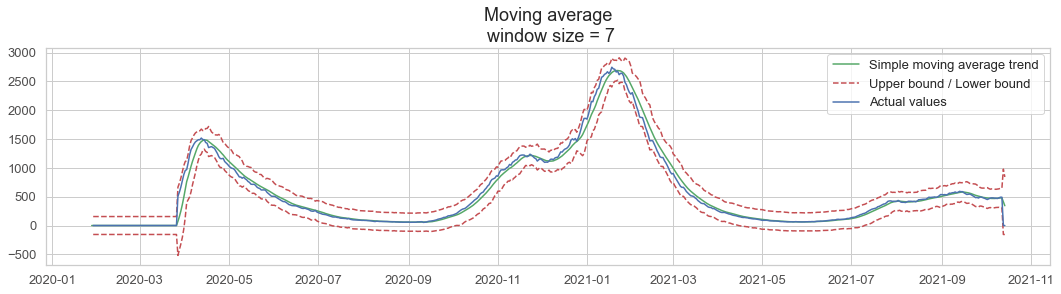

In [68]:
# Demonstrate the use of the function to plot moving averages
plot_moving_average(ci_sample.Hospitalised, 7, plot_intervals=True)
# MODEL ANSWER END

### Question 2:

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

In [70]:
# Return the top three days with biggest difference between daily value and rolling 7-day mean
s = ci_sample.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(3)

,Province/State,Hospitalised,SMA_7,error
Date,,,,
2020-03-27,Channel Islands,509.0,NaN,436.285714
2020-03-28,Channel Islands,579.0,NaN,423.571429
2020-03-29,Channel Islands,667.0,NaN,416.285714


Forecasting is not an exact science so it is recommended that any forecast must have an estimate of error. It looks like this is what the consultant was trying to do here. The mean absolute error code has essentially been used as a method of assessing the forecast accuracy against the actual data. This can be useful in that it can help you understand how much you can trust the forecast. However, in this case, the biggest differences between the daily value and the 7-day mean are essentially resulting from the difference between there being no incidents of hospitalisation to there being the first incidences of hospitalisation, starting on 27 March 2020. You would expect this difference in a dataset like this where data was being collected before cases and hospitalisations from Covid-19 were being records.

### Question 3:

The management team had some additional questions around the project where they asked for further feedback to be included in your final presentation. Make sure to answer the questions in the Notebook in Markdown format in preparation for your presentation. The expectation is that you will provide short and direct responses to help them understand the importance and impact of the questions below.

> ***Note:*** You can double-click on the markdown cells to edit the text.

#### Question 3.1 (double click cell to edit)
- What is the difference between qualitative and quantitative data? How can these be used in business predictions?

Forecasting models can be based on both qualitative and quantitative data. 
- **Qualitative data** is non-numeric data that is typically drawn from the opinions or judgements of customers, consumers or experts. Data is typically unstructured and more subjective so analysis can time consuming and the use of triangulation methods to build credibility in the data. Typical methods to collect data for qualitative forecasting include Delphi Method (to gather opinions of experts), markert research methods (to poll customers and consumers) and panel consensus methods (to make predictions through discussion and voting)
- **Quantitative data** is numerical data that is easy to quantify and analyse using statistical methods. Forecasting based on quantitative data helps you identify patterns and trends in data, and use these to predict future events. Quantitative forecasting methods include causal, correlational and time-series methods.

#### Question 3.2 (double click cell to edit)
- Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

Continuous improvement helps you optimise product and service delivery to both ensure you manage resources efficiently and effectively and delivery an excellent product or service experience. In this case, understanding the likely demand on hospital services and resources will better enable services to be more efficient with resource planning and deliver better patient outcomes.

#### Question 3.3 (double click cell to edit)
- As a government, we adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics? We only work with aggregated data and therefore will not expose any personal details? (Provide an example of how data ethics could apply to this case; two or three sentences max)

Respecting anonymity and privacy is an important part of data ethics but it doesn't stop there. The Covid-19 data and predictions made based on past trends will impact people and society. So, all aspects of how the data is collected, generated, analysed and disseminated need to be considered within the context of an ethical framework, which will help ensure a clear, responsible and consistent approach to the use of data. 